<a href="https://colab.research.google.com/github/VaibhavS008/EDA/blob/main/EDA_Da_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

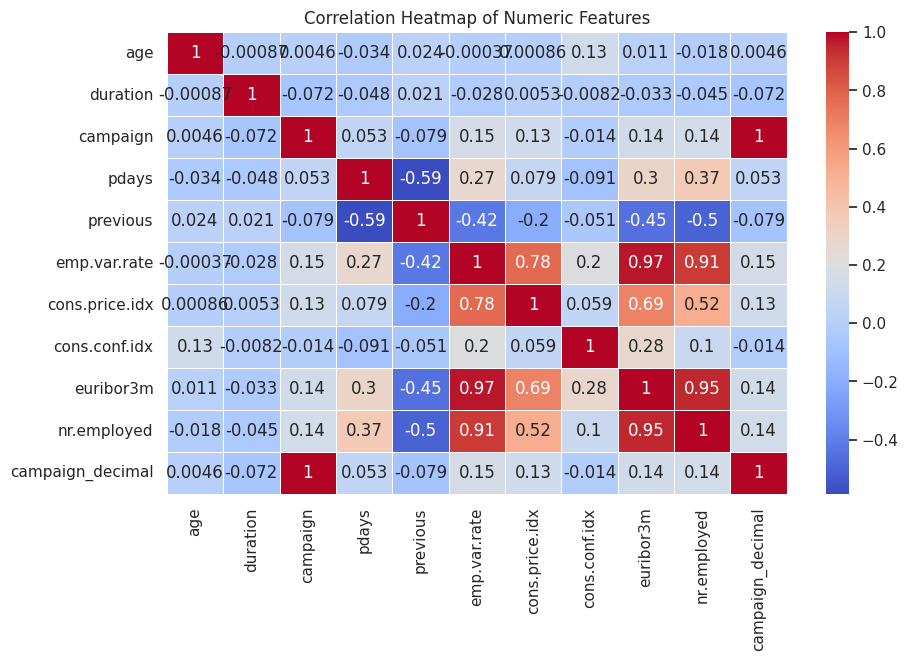

Univariate Analysis - Histogram of 'age':


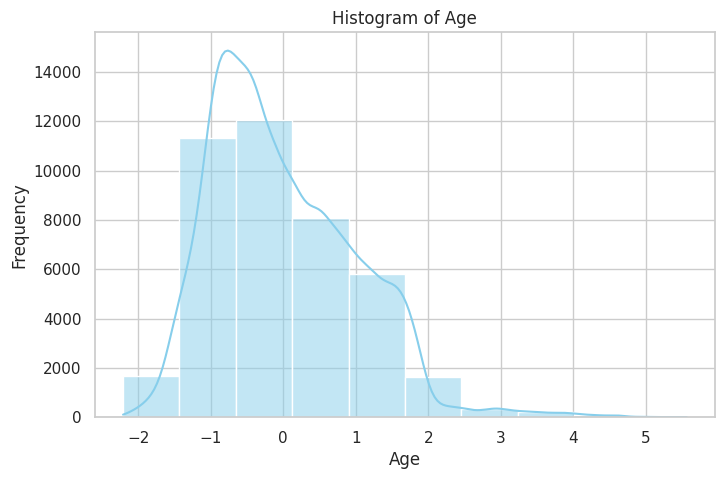

Bivariate Analysis - Scatter plot between 'age' and 'campaign':


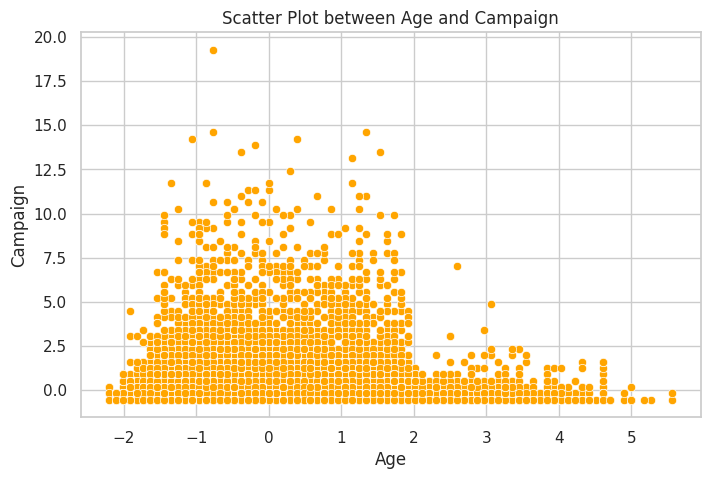

Multivariate Analysis - Correlation Heatmap:


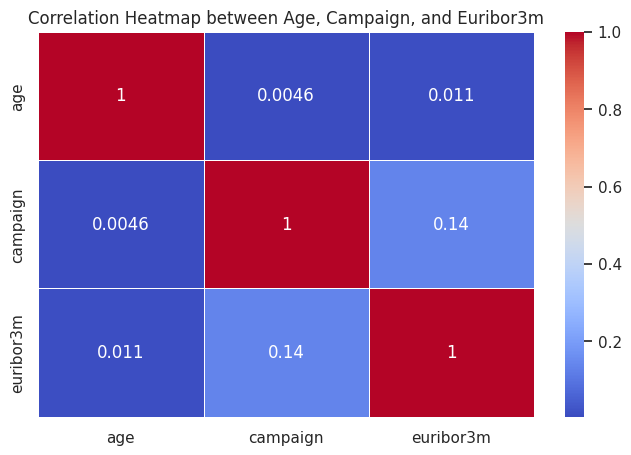

Time Series Visualization of 'campaign':


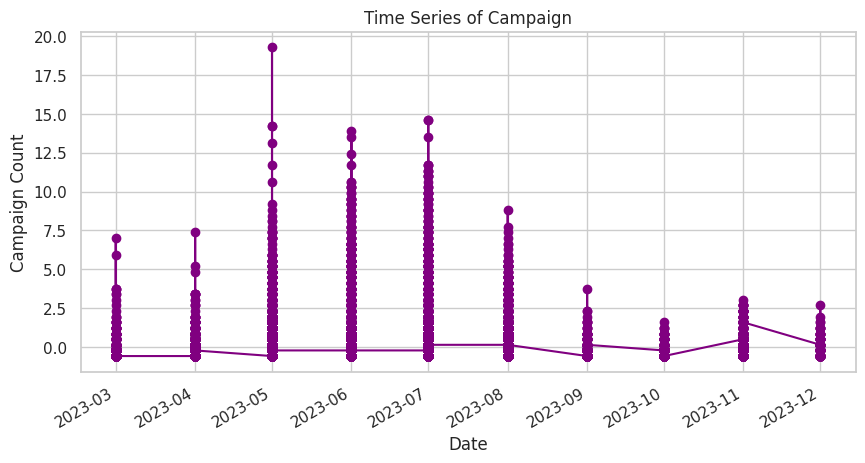

Time Series Correlation between 'campaign' and 'euribor3m':


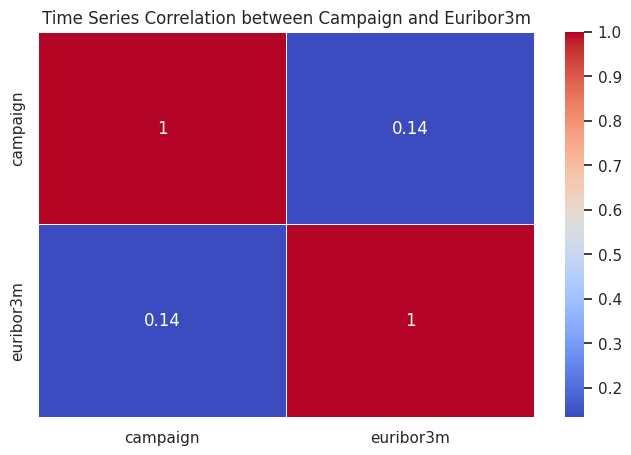

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler


url = 'https://raw.githubusercontent.com/salemprakash/EDA/main/Data/bank-full.csv'
bank_data = pd.read_csv(url, sep=';')

print(bank_data.head())

print("Dimensions of the dataset:", bank_data.shape)

print(bank_data.describe(include='all'))


# Discretization and Binning
# Discretize 'age' into bins
bank_data['age_bins'] = pd.cut(bank_data['age'], bins=[20, 30, 40, 50, 60, 70], labels=['20s', '30s', '40s', '50s', '60s'])
print("Data after discretizing 'age' into bins:\n", bank_data[['age', 'age_bins']].head(20), "\n")

# Outlier Detection and Filtering
# Z-score for detecting outliers
numeric_cols = ['age', 'campaign', 'euribor3m']

# Calculate z-scores for age, campaign , euribor3m
bank_data_zscore = bank_data[numeric_cols].apply(stats.zscore).abs()
print("Z-scores for selected numeric columns:\n", bank_data_zscore.head(), "\n")

# Detect rows where any z-score in these 3 columns is greater than 3
bank_data_outliers = bank_data[(bank_data_zscore > 3).any(axis=1)]
print("Outliers detected in the numeric columns:\n", bank_data_outliers.head(), "\n")

# 6. Permutation and Random Sampling
# Random sample of 10% of the data
sample_bank_data= bank_data.sample(frac=0.1)
print("Random 10% sample of the data:\n", sample_bank_data.head(), "\n")

# 7. Computing Indicators / Dummy Variables
bank_data_dummy = pd.get_dummies(bank_data, columns=['job', 'marital'], drop_first=True)
print("Data after converting 'job' and 'marital' to dummy variables:\n", bank_data_dummy.head(7), "\n")

# 8. Normalization
# Min-Max Normalization
scaler_min_max = MinMaxScaler()
bank_data[['age', 'campaign']] = scaler_min_max.fit_transform(bank_data[['age', 'campaign']])
print("Data after Min-Max normalization of 'age' and 'campaign':\n", bank_data[['age', 'campaign']].head(7), "\n")

# Z-score Normalization
scaler_z = StandardScaler()
bank_data[['age', 'campaign']] = scaler_z.fit_transform(bank_data[['age', 'campaign']])
print("Data after Z-score normalization of 'age' and 'campaign':\n", bank_data[['age', 'campaign']].head(), "\n")

# Decimal scaling normalization
bank_data['campaign_decimal'] = bank_data['campaign'] / 10**np.ceil(np.log10(bank_data['campaign'].abs().max()))
print("Data after Decimal scaling of 'campaign':\n", bank_data[['campaign', 'campaign_decimal']].head(), "\n")

# filtering numeric data
numeric = bank_data.select_dtypes(include=[np.number])
# Correlation matrix of numeric data only
correlation_mat = numeric.corr()
print("Correlation matrix:\n", correlation_mat, "\n")

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_mat, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

sns.set(style="whitegrid")

# Types of Analysis
# Univariate Analysis: Histogram of 'age'
plt.figure(figsize=(8, 5))
print("Univariate Analysis - Histogram of 'age':")
sns.histplot(bank_data['age'], bins=10, color='skyblue', kde=True)
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Bivariate Analysis: Scatter plot between 'age' and 'campaign'
plt.figure(figsize=(8, 5))
print("Bivariate Analysis - Scatter plot between 'age' and 'campaign':")
sns.scatterplot(x=bank_data['age'], y=bank_data['campaign'], color='orange')
plt.title("Scatter Plot between Age and Campaign")
plt.xlabel("Age")
plt.ylabel("Campaign")
plt.grid(True)
plt.show()

# Multivariate Analysis: Correlation Heatmap
print("Multivariate Analysis - Correlation Heatmap:")
correlation_matrix = bank_data[['age', 'campaign', 'euribor3m']].corr()
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap between Age, Campaign, and Euribor3m")
plt.show()



# Time Series Analysis
bank_data['date'] = pd.to_datetime(bank_data['month'] + ' 01 2023', format='%b %d %Y')  # %b for abbreviated month

# Set the date as the index for time series analysis
bank_data.set_index('date', inplace=True)

# Time Series Visualization of 'campaign'
# Convert the 'campaign' column to numeric
plt.figure(figsize=(10, 5))
print("Time Series Visualization of 'campaign':")
bank_data['campaign'].plot(color='purple', linestyle='-', marker='o')
plt.title("Time Series of Campaign")
plt.xlabel("Date")
plt.ylabel("Campaign Count")
plt.grid(True)
plt.show()





# Time Series Correlation between 'campaign' and 'euribor3m'
print("Time Series Correlation between 'campaign' and 'euribor3m':")
time_series_corr = bank_data[['campaign', 'euribor3m']].corr()
plt.figure(figsize=(8, 5))
sns.heatmap(time_series_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Time Series Correlation between Campaign and Euribor3m")
plt.show()